# Polygon fitting from binary mask

First we create a mask with binary blobs and then add a black border of one pixel to this mask.

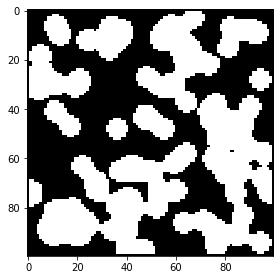

In [197]:
from skimage.io import imread
from skimage import data
import numpy as np
from skimage import io

binary_mask = data.binary_blobs(length=98, blob_size_fraction=0.1)
binary_mask = np.pad(binary_mask, pad_width=1)

io.imshow(binary_mask)
io.show()

Now we can determine all contours of the blobs in this binary mask. The level argument specifies the value along which to find contours in the mask. It should be half the minimum and maximum value. Since we have a binary mask, we choose 0.5.

"This means that to find reasonable contours, it is best to find contours midway between the expected “light” and “dark” values. In particular, given a binarized array, do not choose to find contours at the low or high value of the array. This will often yield degenerate contours, especially around structures that are a single array element wide. Instead choose a middle value, as above." (https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.find_contours)

In [198]:
contours_list = measure.find_contours(binary_mask, level=0.5)
print("Number of contours:", len(contours_list))

Number of contours: 14


Now we want to find a polygon for each contour that fits as close as possible by using the approximate_polygon function from skimage. With the tolerance argument we can control the accuracy of the fit. Higher values cause a lower accuracy of fitting.

In [199]:
polygons = []
for i, contour in enumerate(contours_list):
    polygon_points = measure.approximate_polygon(contour, tolerance=1)
    polygons.append(polygon_points)
    print("Contour {:02d} has {: >3} points.".format(i, len(polygon_points)))

Contour 00 has  32 points.
Contour 01 has   9 points.
Contour 02 has  12 points.
Contour 03 has  12 points.
Contour 04 has  14 points.
Contour 05 has   9 points.
Contour 06 has  50 points.
Contour 07 has  11 points.
Contour 08 has  11 points.
Contour 09 has   9 points.
Contour 10 has  53 points.
Contour 11 has   3 points.
Contour 12 has   6 points.
Contour 13 has   6 points.


To visualize the polygons, we can use them to create binary masks.

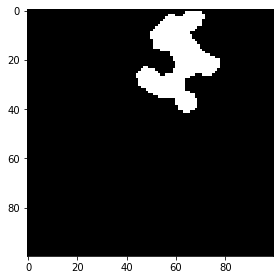

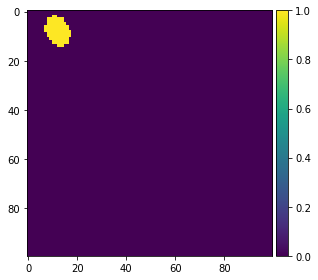

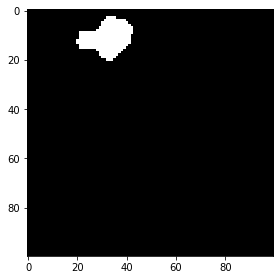

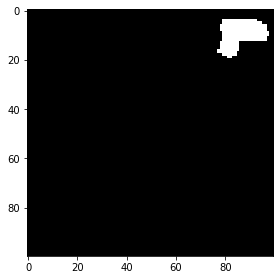

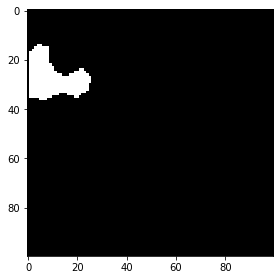

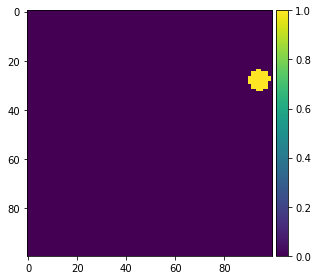

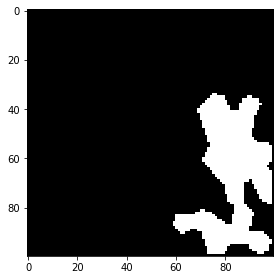

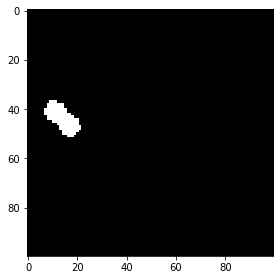

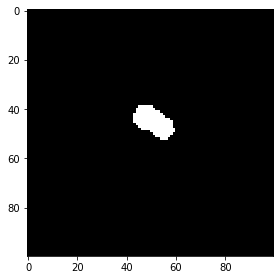

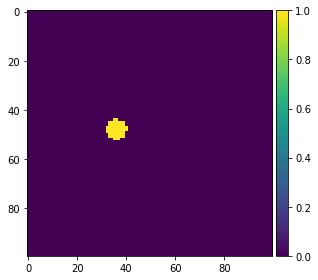

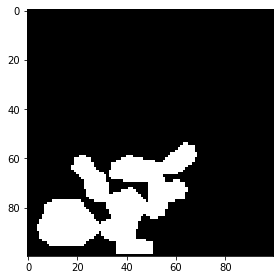

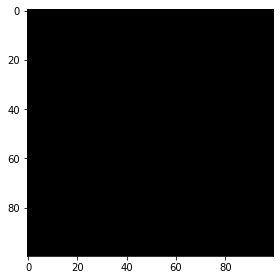

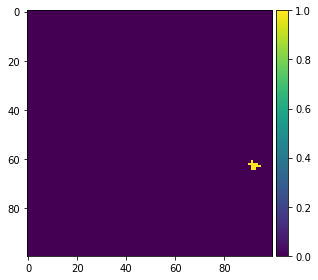

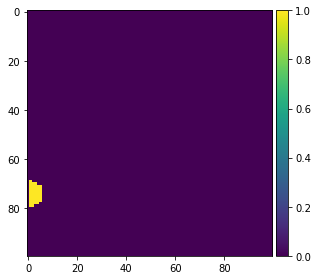

In [200]:
from skimage.draw import polygon2mask

comb_img = np.zeros(binary_mask.shape, dtype=int)
for polygon in polygons:
    img_poly = polygon2mask(binary_mask.shape, polygon)
    comb_img += img_poly 
    io.imshow(img_poly)
    io.show()


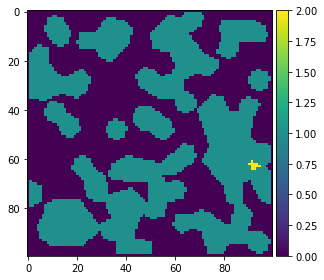

In [201]:
io.imshow(comb_img)
io.show()

The last point is to evaluate how good the fitting actually is.
The squared error of binary origin mask and the newly created mask clearly shows where the differences are.

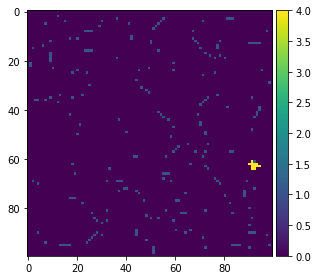

In [202]:
io.imshow((comb_img-binary_mask)**2)
io.show()